In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
emdat_data = pd.read_excel("data/public_emdat_incl_hist_2024-03-26.xlsx")

In [11]:
emdat_data

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1055280.0,2.842847,NaN,2004-10-18,2023-10-17
1,1900-0005-USA,Yes,tec-ind-fir-fir,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26438,2024-0131-BGD,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Restaurant and building,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26439,2024-0132-SEN,No,tec-tra-wat-wat,Technological,Transport,Water,Water,NaN,Migrants,SEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26440,2024-0133-HND,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,HND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26441,2024-0134-MLI,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,MLI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13


<Axes: xlabel='count', ylabel='Disaster Subgroup'>

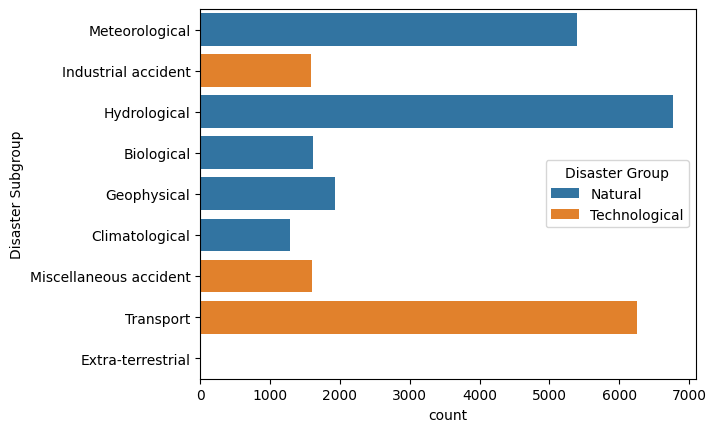

In [4]:
sns.countplot(emdat_data, y="Disaster Subgroup", hue="Disaster Group")

In [5]:
emdat_data[emdat_data["Disaster Subgroup"] == "Extra-terrestrial"]

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
20315,2013-0060-RUS,No,nat-ext-imp-col,Natural,Extra-terrestrial,Impact,Collision,NaN,NaN,RUS,...,NaN,NaN,NaN,NaN,33000.0,41457.0,79.601309,"[{""adm1_code"":2499,""adm1_name"":""Chelyabinskaya...",2014-03-21,2024-02-06


In [29]:
emdat_data["Magnitude Scale"].dropna().unique()

array(['Kph', 'm3', 'Km2', 'Vaccinated', 'Richter', '°C'], dtype=object)

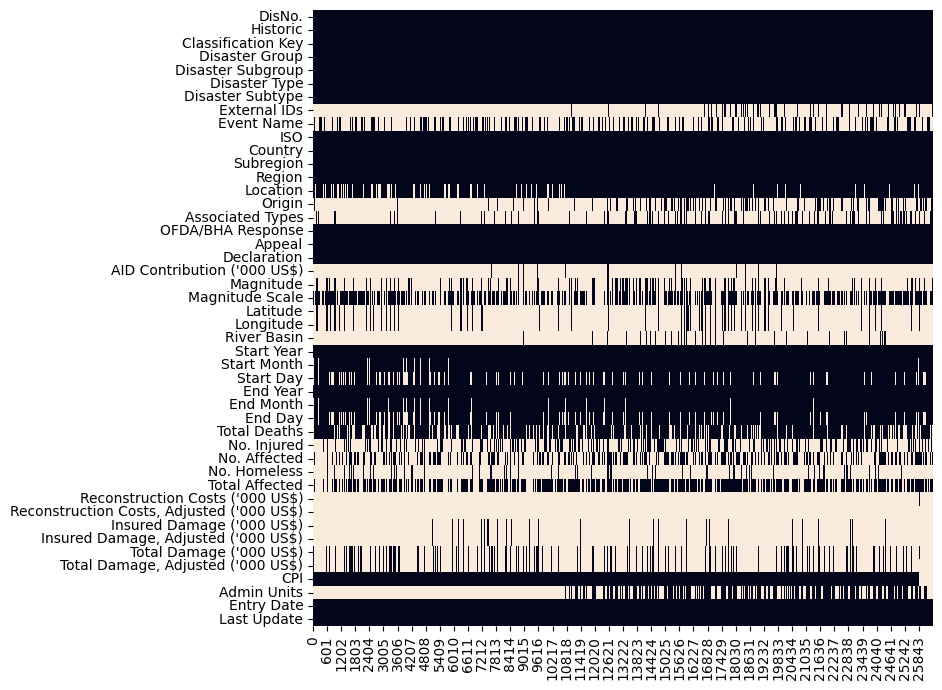

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(emdat_data.isna().T, cbar=False, yticklabels=True, ax=ax)
plt.show()

<Axes: xlabel='Start Year', ylabel='Count'>

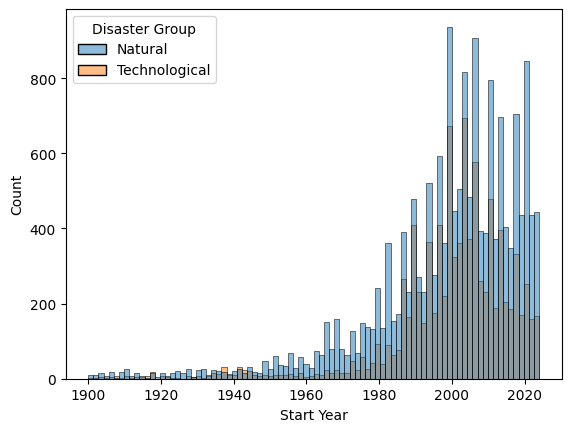

In [15]:
sns.histplot(emdat_data, x="Start Year", hue="Disaster Group")

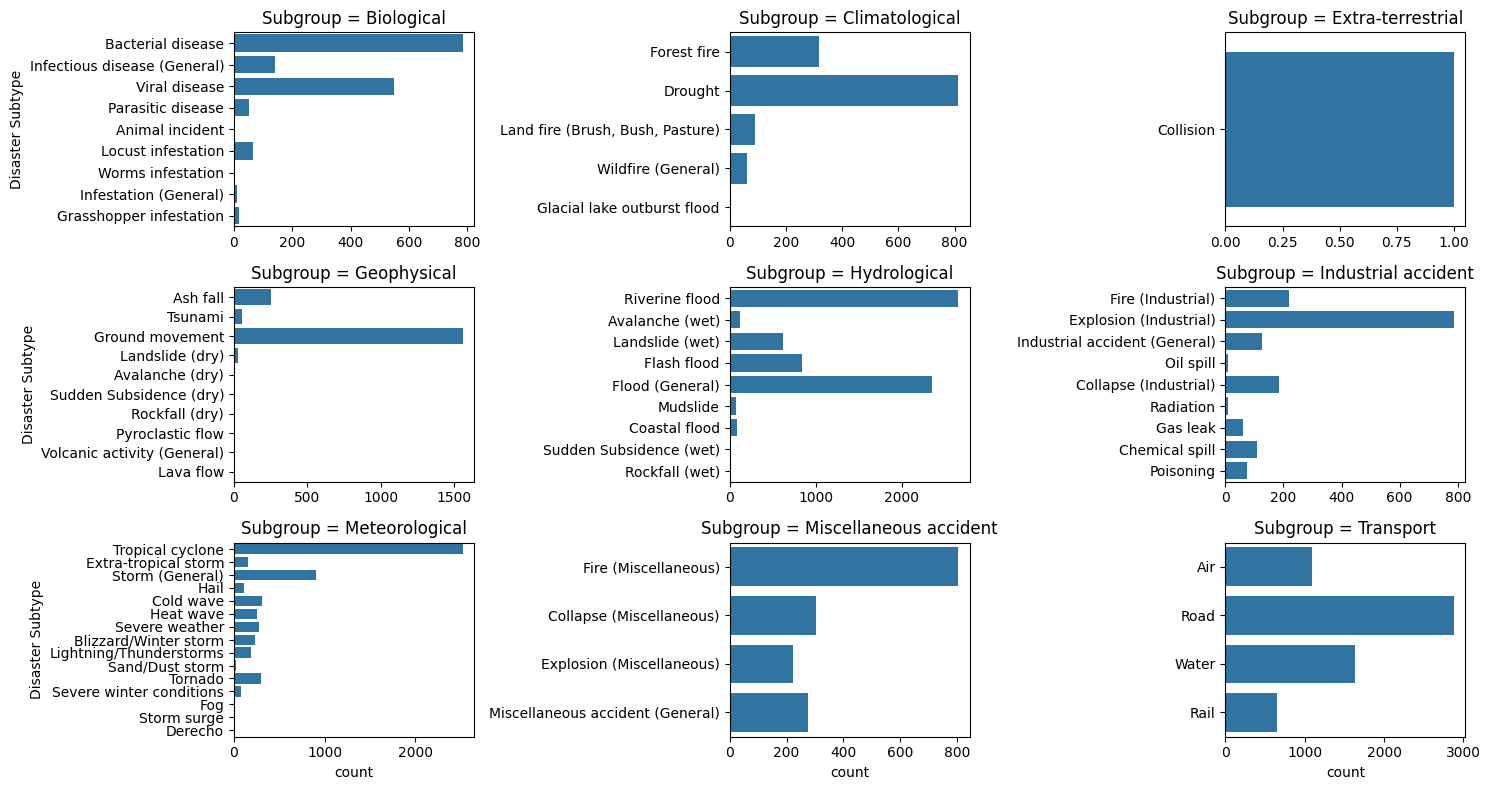

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
for i, (ax, disaster_subgroup) in enumerate(zip(axes.flatten(), emdat_data["Disaster Subgroup"].dropna().unique())):
    sns.countplot(
        emdat_data[emdat_data["Disaster Subgroup"]==disaster_subgroup],
        y="Disaster Subtype",
        legend=False,
        ax=ax,
    )
    if i % 3 != 0:
        ax.set_ylabel("")
    if i < 6:
        ax.set_xlabel("")
    ax.set_title(f"Subgroup = {disaster_subgroup}")
plt.tight_layout()
plt.show()

In [52]:
emdat_data["Start Year"]

18266    2009
16512    2007
16509    2007
15325    2005
16507    2007
         ... 
3946     1984
14324    2004
20473    2013
14172    2004
17998    2009
Name: Start Year, Length: 26443, dtype: int64

In [65]:
total_affected_data = emdat_data[emdat_data["Disaster Group"] == "Natural"].dropna(subset=["Total Affected"])
total_affected_data

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
18266,2009-0491-CMR,No,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,GLIDE:EP-2010-000111,Cholera,CMR,...,NaN,NaN,NaN,NaN,NaN,NaN,73.307177,NaN,2010-08-13,2023-09-25
16512,2007-0067-IDN,No,nat-bio-epi-dis,Natural,Biological,Epidemic,Infectious disease (General),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.848793,NaN,2007-02-16,2023-09-25
16509,2007-0065-BOL,No,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Dengue,BOL,...,NaN,NaN,NaN,NaN,NaN,NaN,70.848793,NaN,2007-02-16,2023-09-25
15325,2005-0508-COD,No,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,Penumonic plague,COD,...,NaN,NaN,NaN,NaN,NaN,NaN,66.731058,NaN,2006-01-19,2023-09-25
16507,2007-0062-CIV,No,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,GLIDE:EP-2007-000027,Meningococcal disease,CIV,...,NaN,NaN,NaN,NaN,NaN,NaN,70.848793,NaN,2008-08-04,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,1998-0016-USA,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,USA,...,NaN,NaN,200000.0,359067.0,1400000.0,2513471.0,55.699863,NaN,2007-05-06,2023-09-25
10236,1999-0202-FRA,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,FRA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.918587,NaN,2003-07-01,2023-09-25
16662,2007-0235-ALB,No,nat-met-ext-hea,Natural,Meteorological,Extreme temperature,Heat wave,GLIDE:HT-2007-000106,NaN,ALB,...,NaN,NaN,NaN,NaN,NaN,NaN,70.848793,"[{""adm1_code"":305,""adm1_name"":""Berat""},{""adm1_...",2008-08-04,2023-09-25
9630,1998-0180-USA,Yes,nat-met-sto-hai,Natural,Meteorological,Storm,Hail,NaN,NaN,USA,...,NaN,NaN,800500.0,1437167.0,1000000.0,1795337.0,55.699863,NaN,2006-07-09,2023-09-25


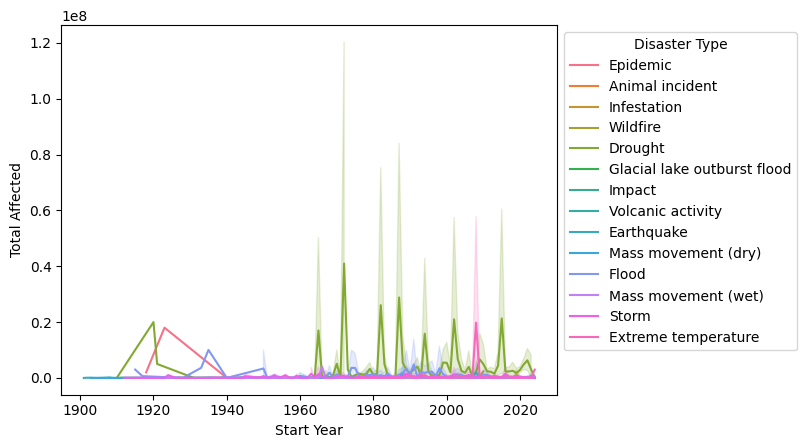

In [83]:
ax = sns.lineplot(
    total_affected_data
    # # Boolean filters to zoom into the plot by removing the largest values
    # [
    #     (total_affected_data["Disaster Type"] != "Drought") 
    #     * (total_affected_data["Disaster Type"] != "Epidemic")
    #     * (total_affected_data["Disaster Type"] != "Extreme temperature")
    # ]
    ,
    x="Start Year",
    y="Total Affected",
    hue="Disaster Type",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [90]:
total_damage_adjusted = emdat_data[emdat_data["Disaster Group"] == "Natural"].dropna(subset=["Total Damage, Adjusted ('000 US$)"])
total_damage_adjusted

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
11005,2000-0249-AUS,No,nat-bio-inf-loc,Natural,Biological,Infestation,Locust infestation,NaN,NaN,AUS,...,NaN,NaN,NaN,NaN,120000.0,203941.0,58.840648,NaN,2003-07-01,2023-09-25
9119,1997-0202-MDG,Yes,nat-bio-inf-loc,Natural,Biological,Infestation,Locust infestation,NaN,NaN,MDG,...,NaN,NaN,NaN,NaN,3500.0,6381.0,54.848454,NaN,2003-07-01,2023-09-25
8110,1995-0090-COL,Yes,nat-bio-inf-inf,Natural,Biological,Infestation,Infestation (General),NaN,NaN,COL,...,NaN,NaN,NaN,NaN,104000.0,199734.0,52.069299,NaN,2003-07-01,2023-09-25
1831,1969-0011-NIC,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Equine encephalitis,NIC,...,NaN,NaN,NaN,NaN,7.0,56.0,12.534675,NaN,2003-07-01,2023-09-25
9679,1998-0238-CMR,Yes,nat-bio-inf-loc,Natural,Biological,Infestation,Locust infestation,NaN,NaN,CMR,...,NaN,NaN,NaN,NaN,1700.0,3052.0,55.699863,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,1998-0031-USA,Yes,nat-met-sto-hai,Natural,Meteorological,Storm,Hail,NaN,NaN,USA,...,NaN,NaN,62500.0,112209.0,62500.0,112209.0,55.699863,NaN,2006-07-09,2023-09-25
9573,1998-0106-IND,Yes,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,10000.0,17953.0,55.699863,NaN,2003-07-01,2023-09-25
9493,1998-0016-USA,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,USA,...,NaN,NaN,200000.0,359067.0,1400000.0,2513471.0,55.699863,NaN,2007-05-06,2023-09-25
9630,1998-0180-USA,Yes,nat-met-sto-hai,Natural,Meteorological,Storm,Hail,NaN,NaN,USA,...,NaN,NaN,800500.0,1437167.0,1000000.0,1795337.0,55.699863,NaN,2006-07-09,2023-09-25


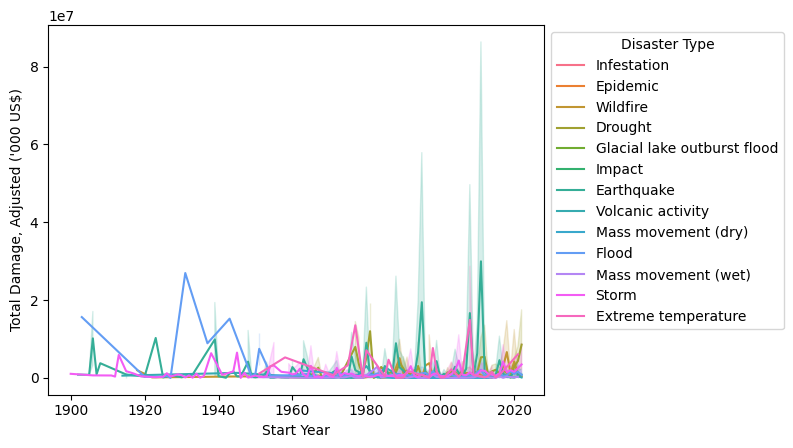

In [93]:
ax = sns.lineplot(
    total_damage_adjusted,
    x="Start Year",
    y="Total Damage, Adjusted ('000 US$)",
    hue="Disaster Type",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))